In [1]:
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./datasets/winequality-white.csv',sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:title={'center':'Quality Distribution Plot'}, xlabel='quality', ylabel='Density'>

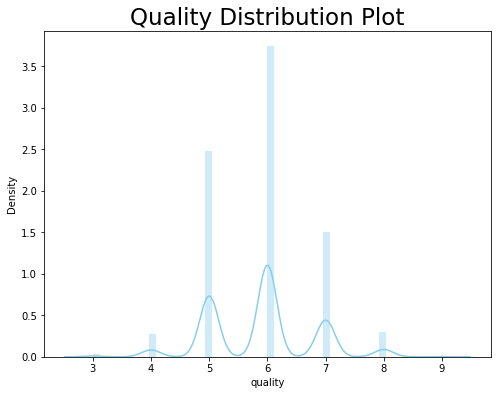

In [6]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Quality Distribution Plot',fontsize=23)
seaborn.distplot(df['quality'], color='skyblue')

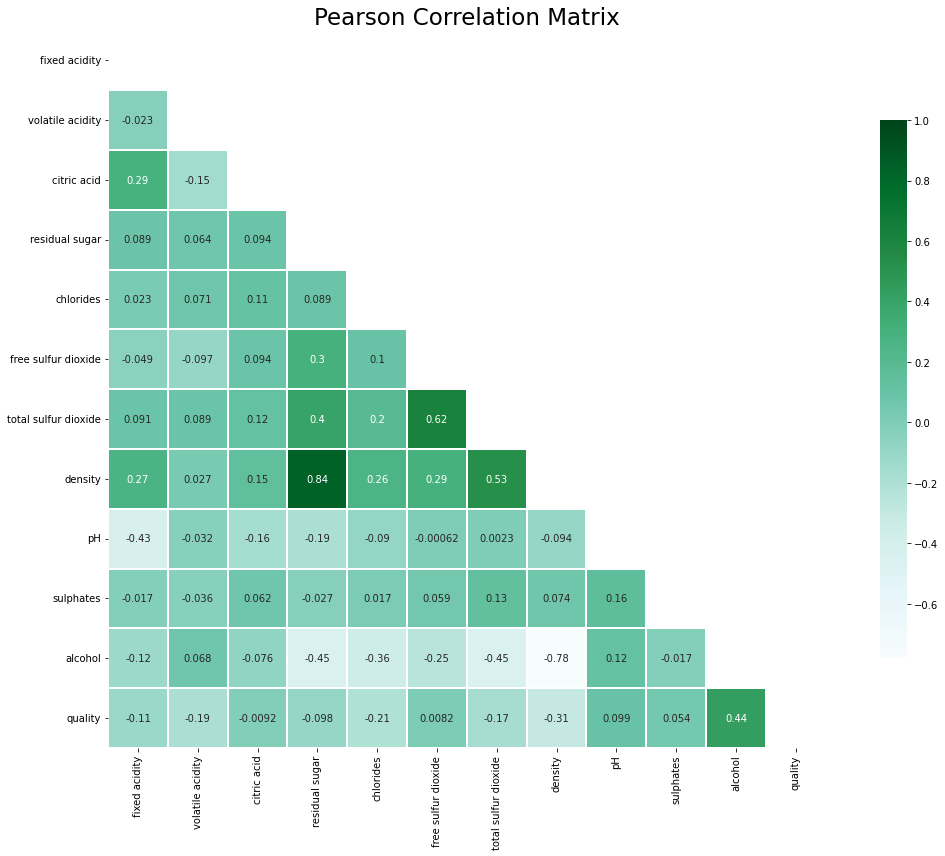

In [7]:
mask = np.zeros_like(df[df.columns].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=23)

seaborn.heatmap(df[df.columns].corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

# most correlating columns
features = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

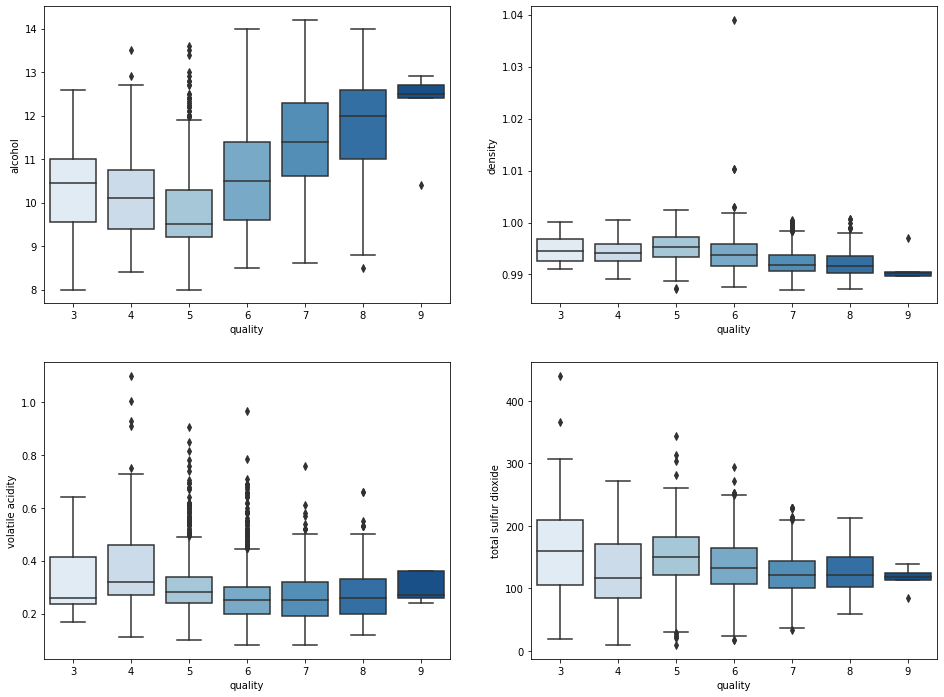

In [8]:
f2, ax = plt.subplots(2, 2, figsize=(16, 12))
seaborn.boxplot('quality', 'alcohol', data=df, ax=ax[0, 0], palette='Blues')
seaborn.boxplot('quality', 'density', data=df, ax=ax[0, 1], palette='Blues')
seaborn.boxplot('quality', 'volatile acidity', data=df, ax=ax[1, 0], palette='Blues')
seaborn.boxplot('quality', 'total sulfur dioxide', data=df, ax=ax[1, 1], palette='Blues')

With k-Means, you could use the inertia or silhouette score to select the appropriate number of clusters. But with GMM, it’s not possible to use these metrics because they are not reliable when clusters are not spherical or have different sizes. Instead you can try to find the model that minimizes a theoretical information criterion, such as “AIC” or “BIC”.

In [9]:
df_dropped = df.drop('quality', axis=1)
X = df_dropped.values
Clus_dataset = StandardScaler().fit_transform(X)

from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
# https://michael-fuchs-python.netlify.app/2020/06/24/gaussian-mixture-models/

bic = []
aic = []
silhouette = []
for i in range(1,11):
    clusterer = GaussianMixture(n_components=i, random_state=51, n_init=5)
    labels = clusterer.fit_predict(X)
    bic.append(clusterer.bic(X))
    aic.append(clusterer.aic(X))

    # plot_gmm(clusterer, X)

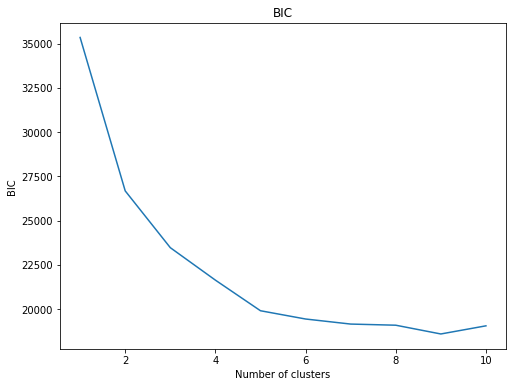

In [10]:
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),bic)
plt.title('BIC')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

[1 0 0 ... 0 0 0]
[2 0 1 ... 1 1 1]
[1 2 0 ... 2 2 0]
[0 3 3 ... 3 3 3]
[0 1 5 ... 5 5 5]
[1 2 0 ... 0 0 0]
[5 1 6 ... 6 6 6]
[5 6 1 ... 6 1 1]
[6 0 4 ... 0 0 4]


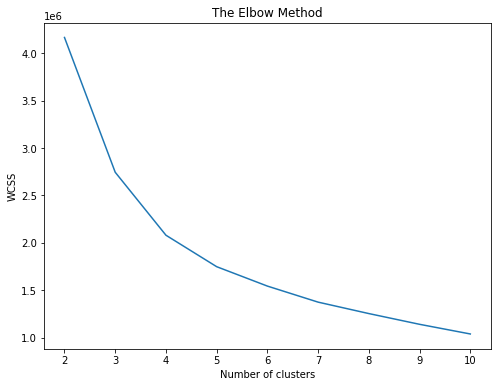

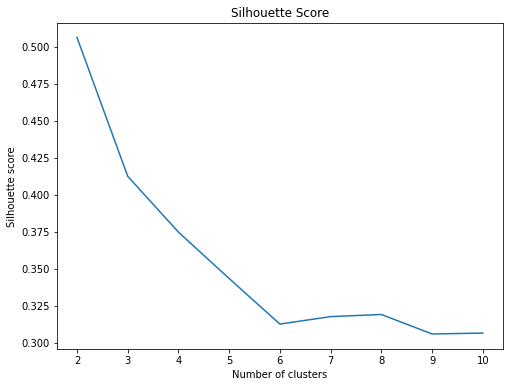

In [11]:
df_dropped = df.drop('quality', axis=1)
X = df_dropped.values
Clus_dataset = StandardScaler().fit_transform(X)

wcss = []
silhouette = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.labels_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2,11),silhouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


In [12]:
clusterNum = 2
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit_predict(X)
labels = k_means.labels_
df_dropped['Clus_km'] = labels

Text(0, 0.5, 'quality')

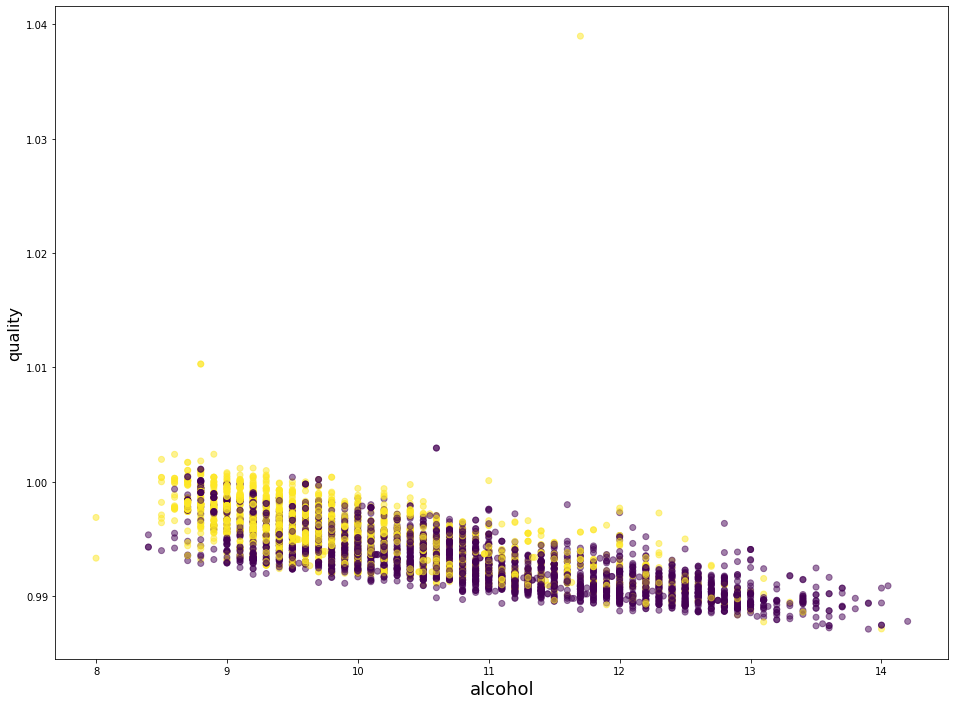

In [13]:

f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(df_dropped['alcohol'], df_dropped['density'], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('quality', fontsize=16)


In [14]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
sample_silhouette_values = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.5062782327345698

In [15]:
clusterer = GaussianMixture(n_components=3, random_state=51, n_init=5, max_iter=1000)

labels = clusterer.fit_predict(X)
print(clusterer.converged_)
probs = clusterer.predict_proba(X)
silhouette_score(X, labels)
# for label, prob in zip(labels, probs):
#     print(f'Label: {label}')
#     print(f'\t{["{0:0.2f}".format(i) for i in prob]}')

True


-0.00461024746873589

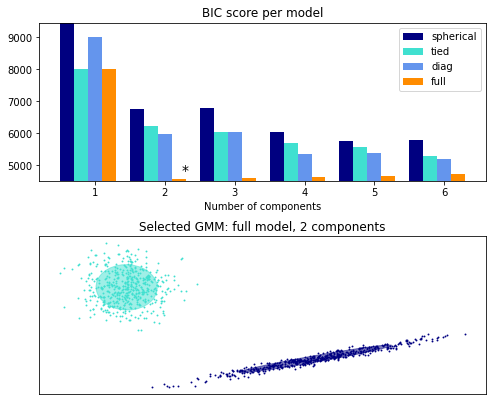

In [16]:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
# plt.show()